In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import os

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [5]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 849MB/s]


In [6]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip


Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
print("Datos cargados correctamente.")
print(f"Tamaño del train: {train.shape}")
print(f"Tamaño del test: {test.shape}")
print("\n--- Vista previa del train ---")
display(train.head())

print("\n--- Tipos de datos ---")
print(train.dtypes)

Datos cargados correctamente.
Tamaño del train: (692500, 21)
Tamaño del test: (296786, 20)

--- Vista previa del train ---


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294



--- Tipos de datos ---
ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
dtype: object


In [9]:
target_col = "RENDIMIENTO_GLOBAL"  # nombre del target (puedes ajustar si cambia)
if target_col in train.columns:
    print(f"\nVariable objetivo detectada: '{target_col}'")
else:
    raise ValueError("No se encontró la columna de target en train.csv")

X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_test = test.copy()

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nColumnas numéricas:", len(num_cols))
print("Columnas categóricas:", len(cat_cols))


Variable objetivo detectada: 'RENDIMIENTO_GLOBAL'

Columnas numéricas: 6
Columnas categóricas: 14


In [10]:
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

print("Imputación de valores faltantes completada.")

Imputación de valores faltantes completada.


In [11]:
label_enc = LabelEncoder()

label_cols = [c for c in cat_cols if X_train[c].nunique() <= 10]

for col in label_cols:
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.transform(X_test[col])

print(f"Columnas codificadas con LabelEncoder: {label_cols}")

Columnas codificadas con LabelEncoder: ['E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1']


In [12]:
onehot_cols = [c for c in cat_cols if c not in label_cols]

X_train = pd.get_dummies(X_train, columns=onehot_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=onehot_cols, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(f"One-Hot Encoding aplicado y alineación completada.")
print(f"Shapes finales -> X_train: {X_train.shape}, X_test: {X_test.shape}")

One-Hot Encoding aplicado y alineación completada.
Shapes finales -> X_train: (692500, 1015), X_test: (296786, 1015)


In [13]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Escalamiento de variables numéricas completado.")

Escalamiento de variables numéricas completado.


In [14]:
train_preprocessed = pd.concat([X_train, y_train], axis=1)

print("\nDatos preprocesados listos")
display(train_preprocessed.head())
display(X_test.head())

train_preprocessed.to_csv("train_preprocessed.csv", index=False)
X_test.to_csv("test_preprocessed.csv", index=False)

print("Archivos guardados: train_preprocessed.csv y test_preprocessed.csv")


--- Datos preprocesados listos ---


,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,F_EDUCACIONMADRE_No Aplica,F_EDUCACIONMADRE_No sabe,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Técnica o tecnológica incompleta,RENDIMIENTO_GLOBAL
0,1.434424,1.294094,3,3,2,1,1,1,0,0,...,False,False,True,False,False,False,False,False,False,medio-alto
1,0.527513,1.294094,1,0,2,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,bajo
2,-0.652132,0.439801,1,4,2,1,1,0,0,0,...,False,False,False,False,False,True,False,False,False,bajo
3,-0.084924,-0.319570,2,0,3,1,1,0,0,0,...,False,False,False,False,False,True,False,False,False,alto
4,1.731274,1.294094,1,2,2,1,1,1,0,0,...,False,False,False,True,False,False,False,False,False,medio-bajo


,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,F_EDUCACIONMADRE_Ninguno,F_EDUCACIONMADRE_No Aplica,F_EDUCACIONMADRE_No sabe,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,0.194793,-1.458627,5,3,2,1,1,0,0,1,...,False,False,False,False,True,False,False,False,False,False
1,-1.386841,0.439801,1,2,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0.016012,1.294094,0,0,2,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,1.009765,-0.319570,0,2,0,0,1,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,1.017486,1.294094,1,1,1,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False


Archivos guardados: train_preprocessed.csv y test_preprocessed.csv


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

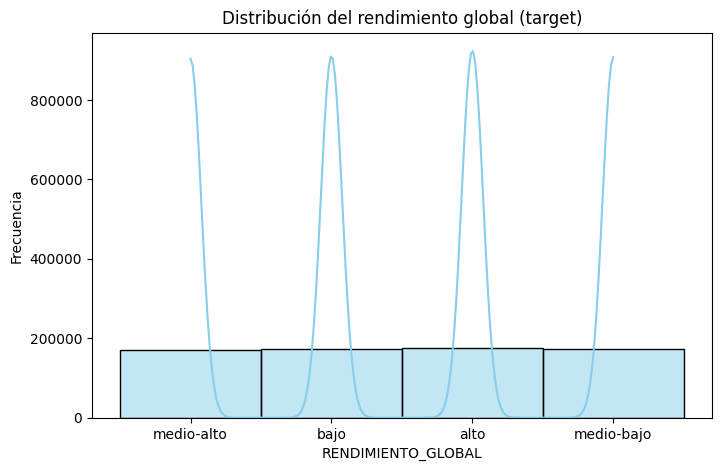

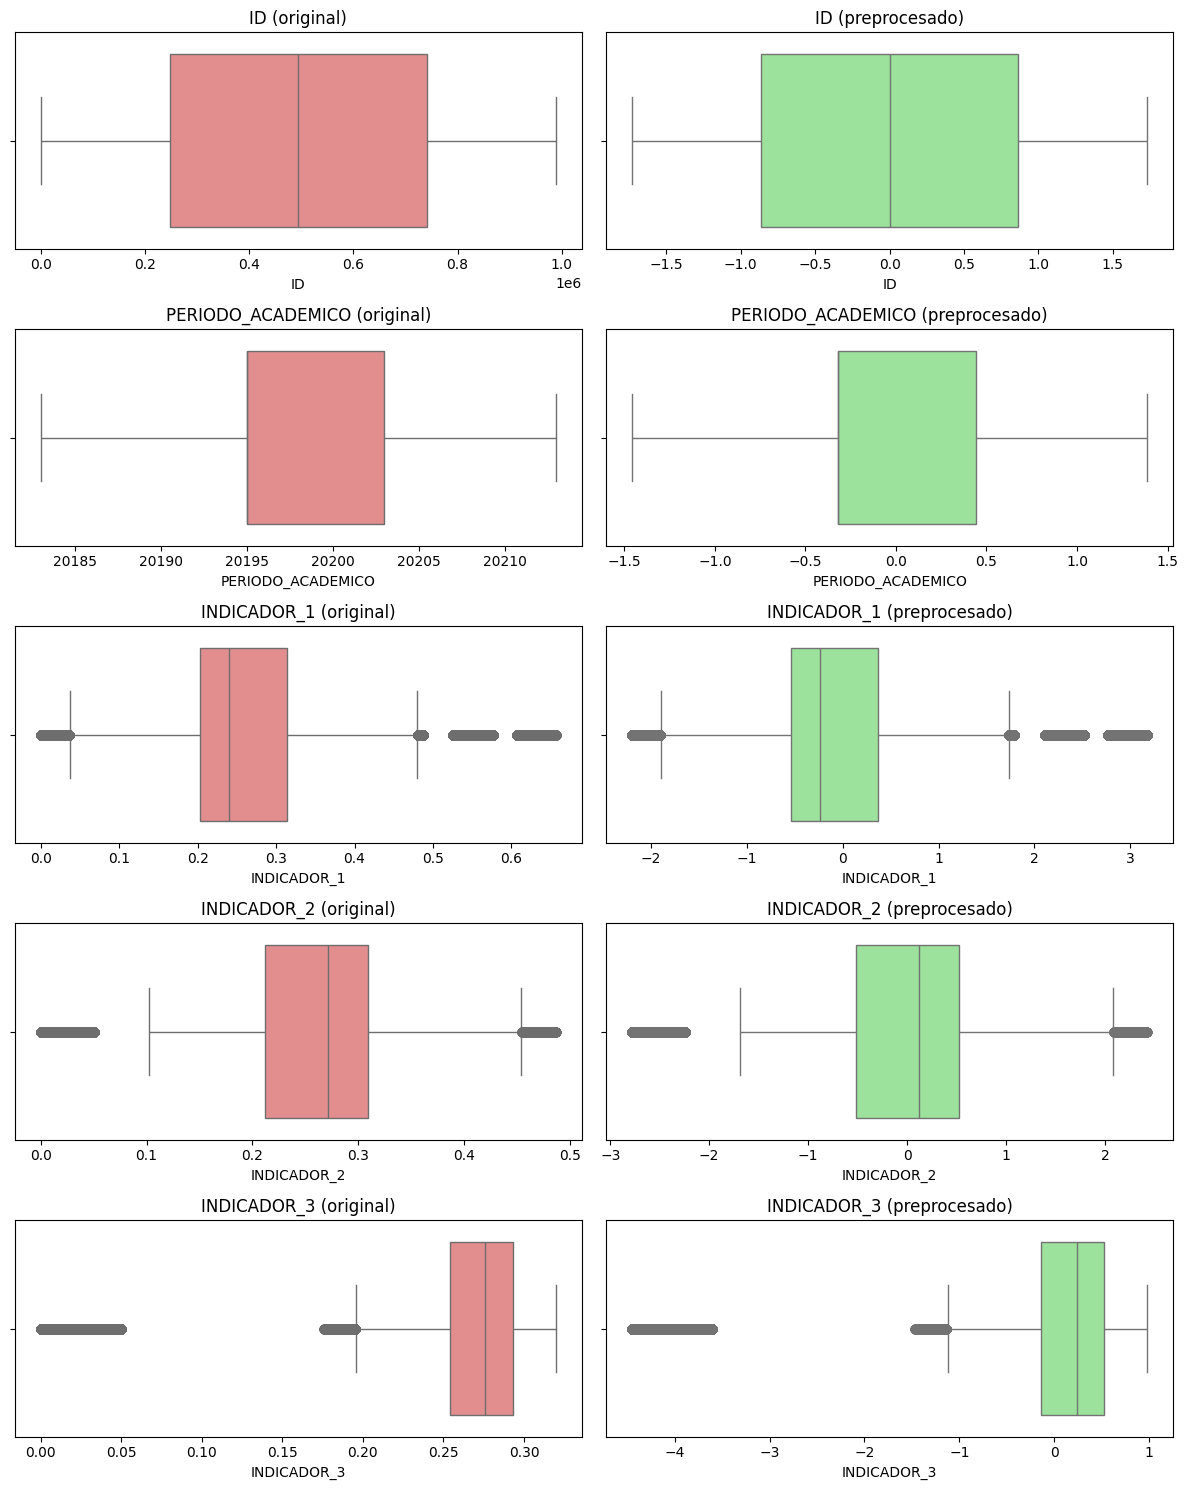

Número de columnas originales: 21
Número de columnas preprocesadas: 1016


In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(train_preprocessed["RENDIMIENTO_GLOBAL"], bins=20, kde=True, color="skyblue")
plt.title("Distribución del rendimiento global (target)")
plt.xlabel("RENDIMIENTO_GLOBAL")
plt.ylabel("Frecuencia")
plt.show()

sample_num_cols = num_cols[:5]
fig, axes = plt.subplots(len(sample_num_cols), 2, figsize=(12, len(sample_num_cols) * 3))

for i, col in enumerate(sample_num_cols):
    sns.boxplot(x=train[col], ax=axes[i, 0], color="lightcoral")
    axes[i, 0].set_title(f"{col} (original)")
    sns.boxplot(x=train_preprocessed[col], ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"{col} (preprocesado)")

plt.tight_layout()
plt.show()

print(f"Número de columnas originales: {train.shape[1]}")
print(f"Número de columnas preprocesadas: {train_preprocessed.shape[1]}")

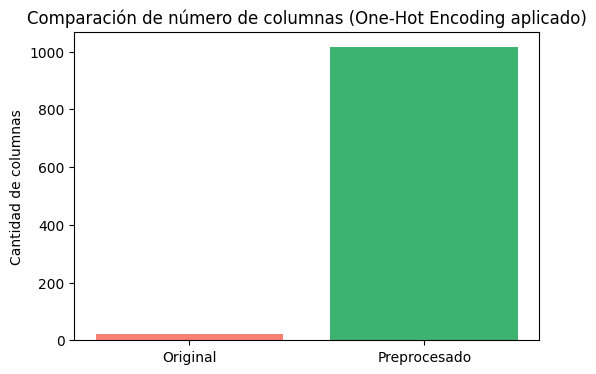

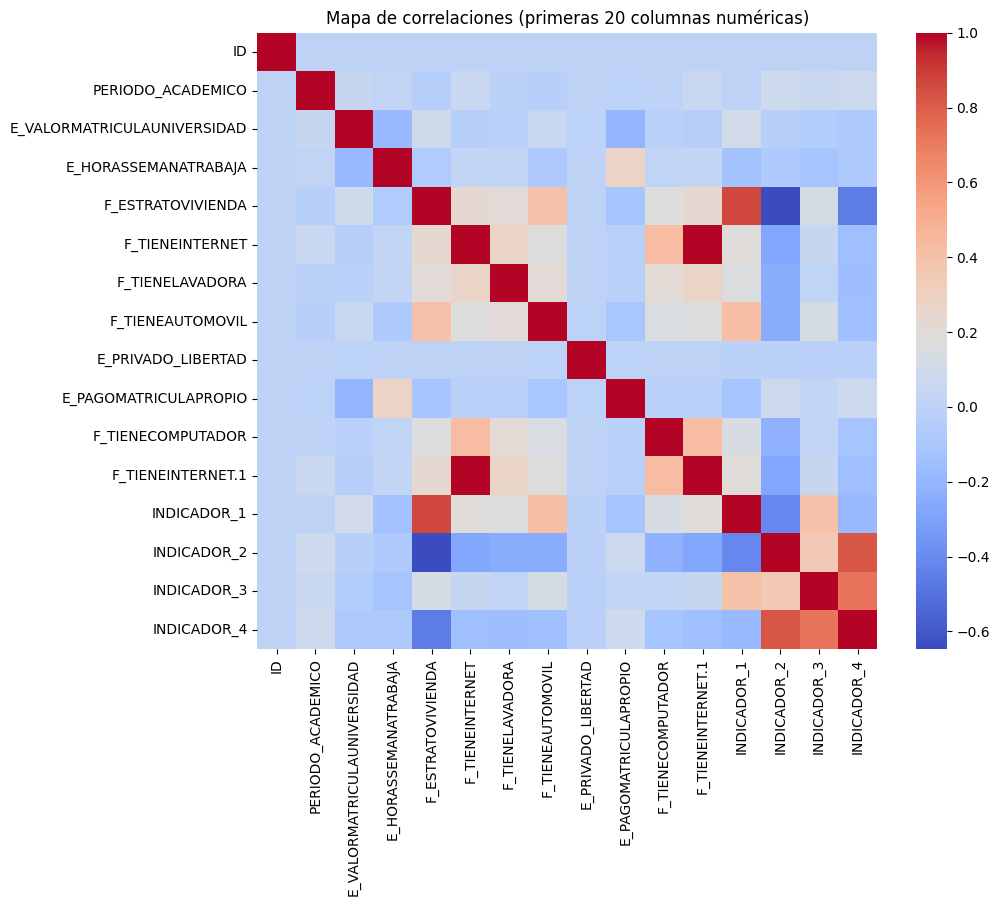

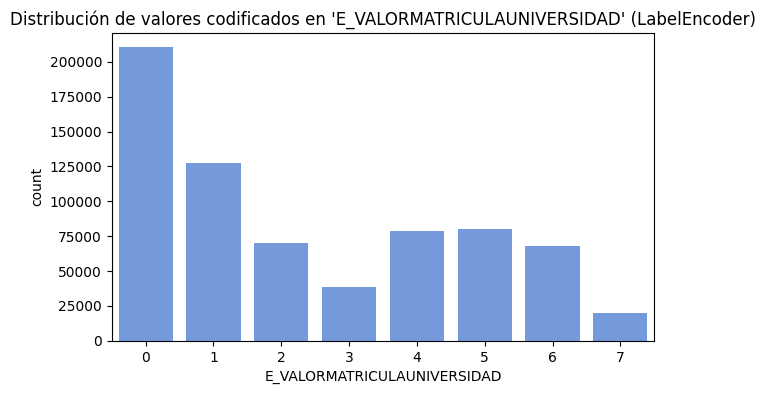

In [17]:
plt.figure(figsize=(6, 4))
plt.bar(["Original", "Preprocesado"],
        [train.shape[1], train_preprocessed.shape[1]],
        color=["salmon", "mediumseagreen"])
plt.title("Comparación de número de columnas (One-Hot Encoding aplicado)")
plt.ylabel("Cantidad de columnas")
plt.show()

corr = train_preprocessed.select_dtypes(include=["float64", "int64"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr.head(20).iloc[:20, :20], cmap="coolwarm", annot=False)
plt.title("Mapa de correlaciones (primeras 20 columnas numéricas)")
plt.show()

if label_cols:
    example_col = label_cols[0]
    plt.figure(figsize=(7, 4))
    sns.countplot(x=train_preprocessed[example_col], color="cornflowerblue")
    plt.title(f"Distribución de valores codificados en '{example_col}' (LabelEncoder)")
    plt.show()